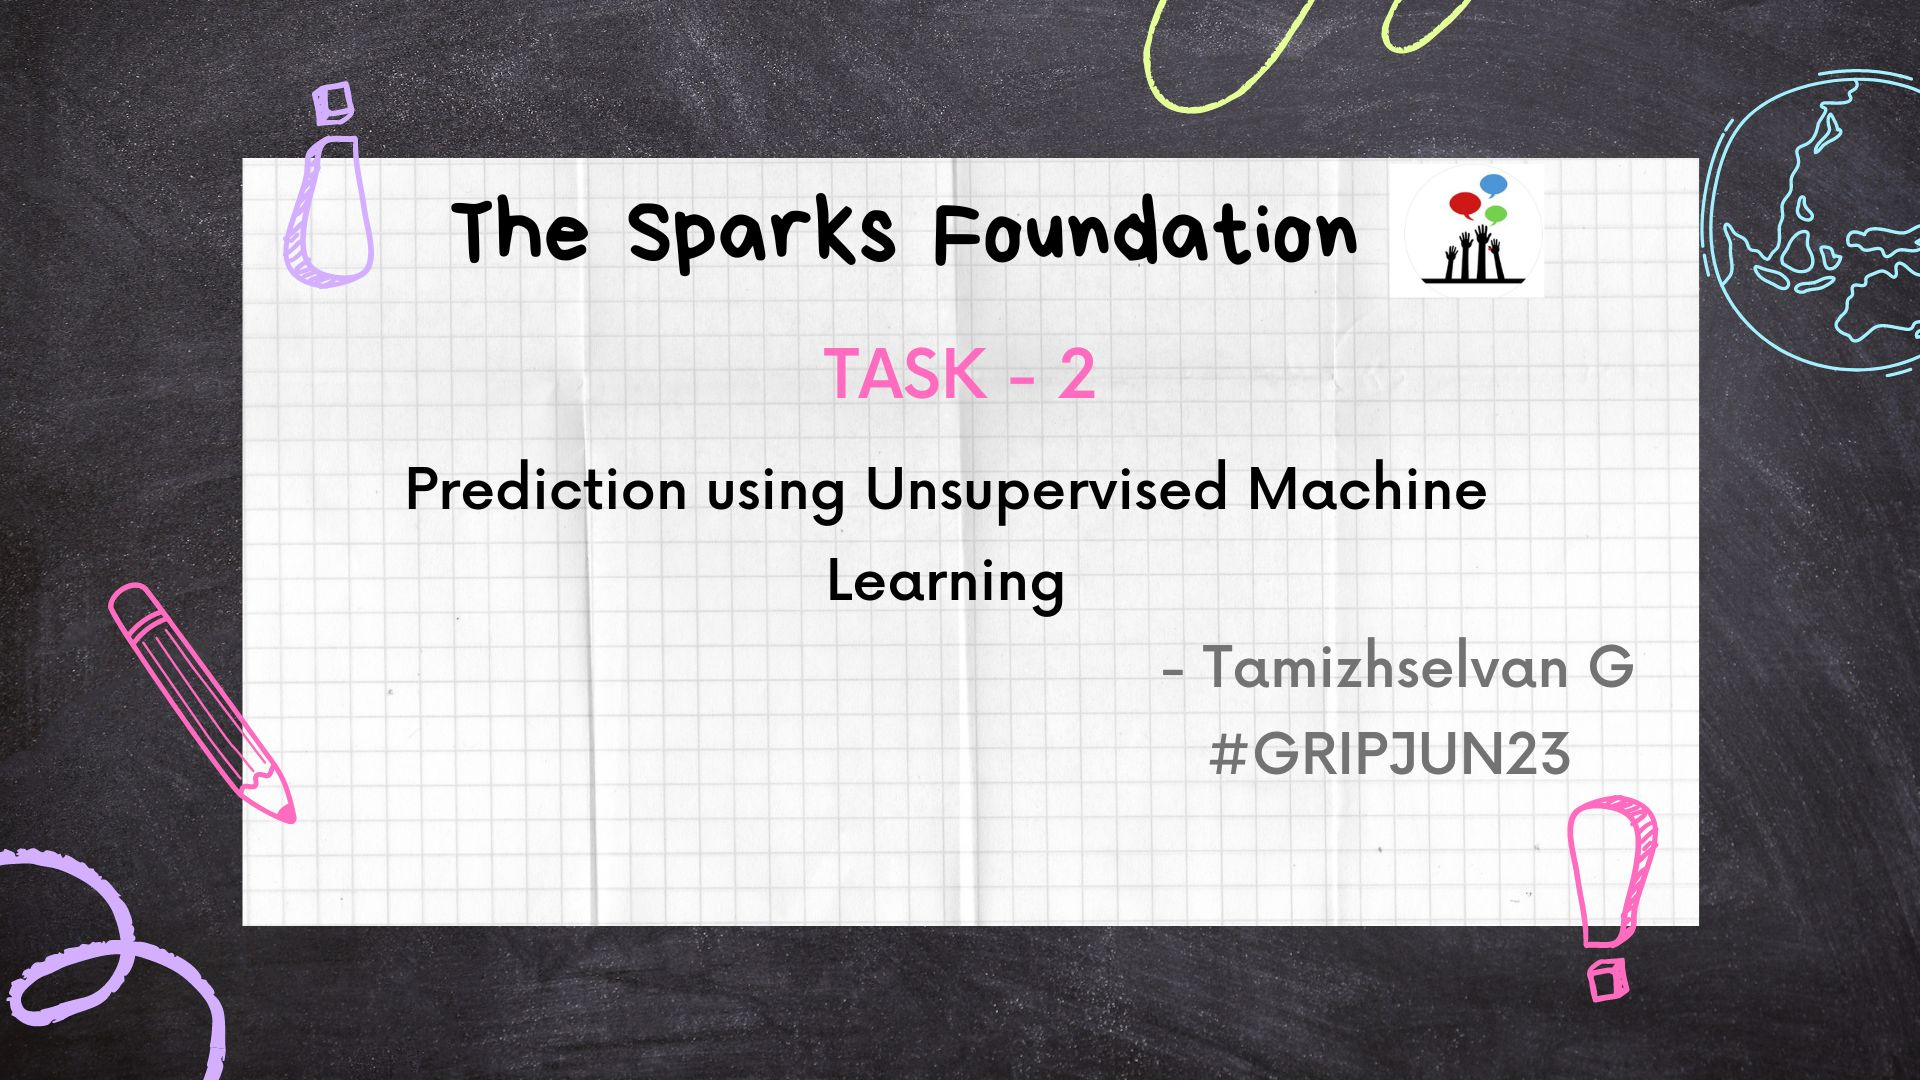

**Author: Tamizhselvan G**

**Batch: GRIPJUNE23**

.

.

.

**Loading the required Libraries**

In [36]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Iris.csv')

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Understanding the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
#To check if there is ant null values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

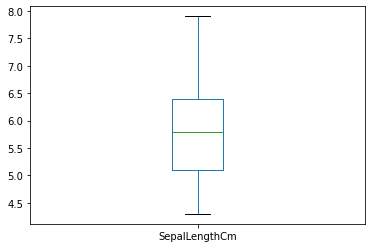

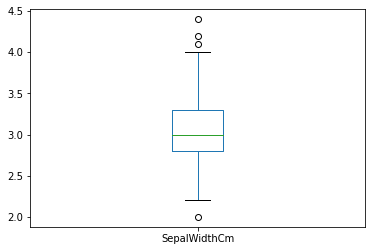

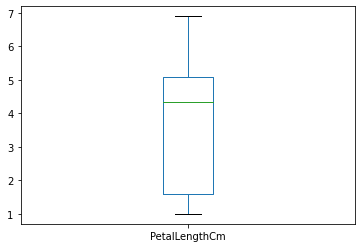

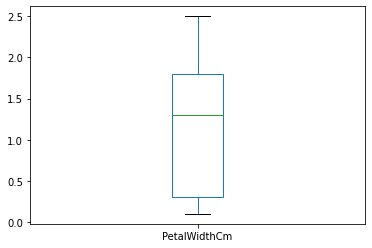

In [31]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(df,'SepalLengthCm') 
plot_boxplot(df,'SepalWidthCm') 
plot_boxplot(df,'PetalLengthCm') 
plot_boxplot(df,'PetalWidthCm') 

In [33]:
cols= df.iloc[:,1:5]
cols.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

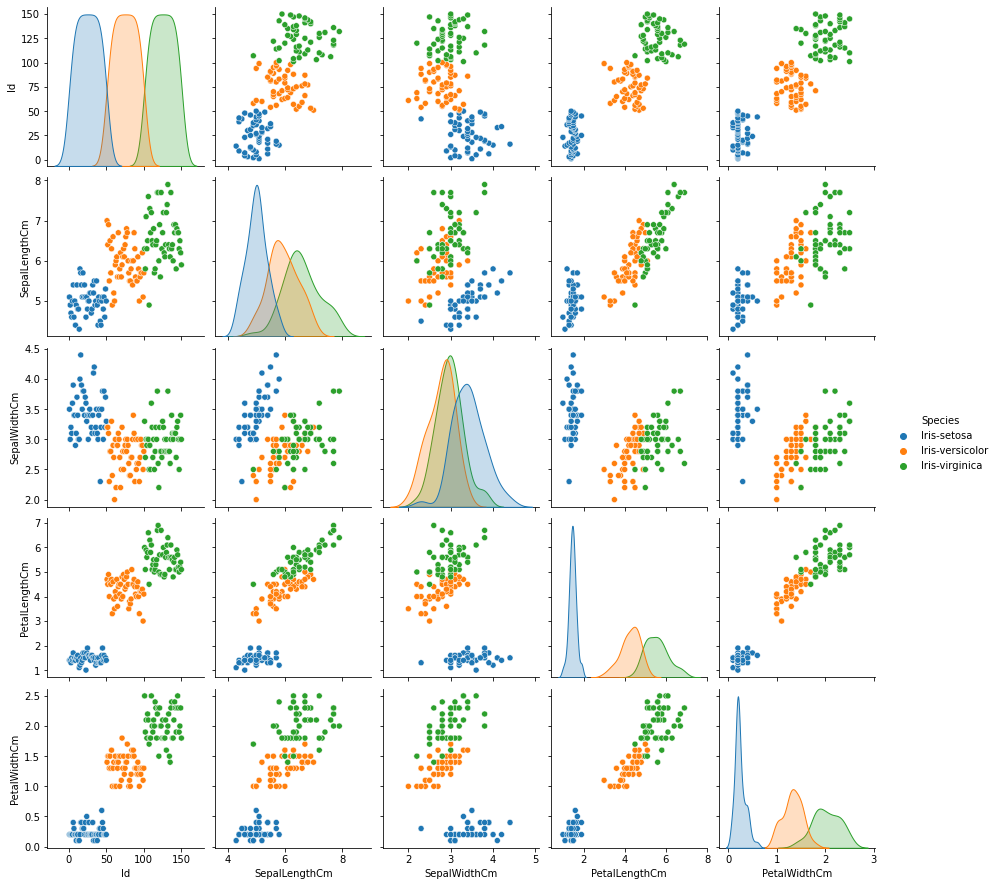

In [34]:
sns.pairplot(df,hue='Species')

# Finding the Optimal K value

**by using the below two methods.**
    

**1). Elbow Method**

**2). Silhoutte analysis**

In [37]:
df_new = df.drop('Species',1)
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [51]:
wcss = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)


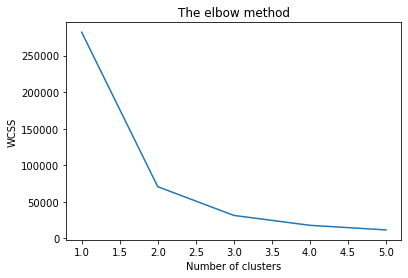

In [52]:
# Plotting the results onto a line graph, 
#allowing us to observe 'The elbow'
plt.plot(range(1, 6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Now let's do the silhouette analysis

In [55]:
#Silhouette analysis
range_n_clusters = [3,4,5]

for num_clusters in range_n_clusters:
    
    #initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df_new)
    
    cluster_labels = kmeans.labels_
    
    #Silhouette score
    silhouette_avg = silhouette_score(df_new,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=3, the silhouette score is 0.5821934246576435
For n_clusters=4, the silhouette score is 0.5564924303093528
For n_clusters=5, the silhouette score is 0.5405022576134032


For 3 clusters, we can find an optimal clustering of the dataset. This result matches with our visual interpretation. 

# Building the Model with 3 clusters

In [57]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

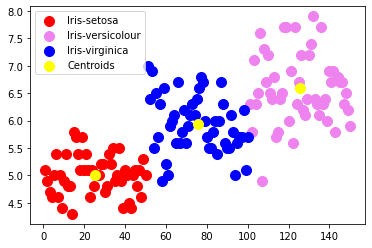

In [74]:
# Visualising the clusters - On the first two columns
x = df.iloc[:,[0,1,2,3]].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

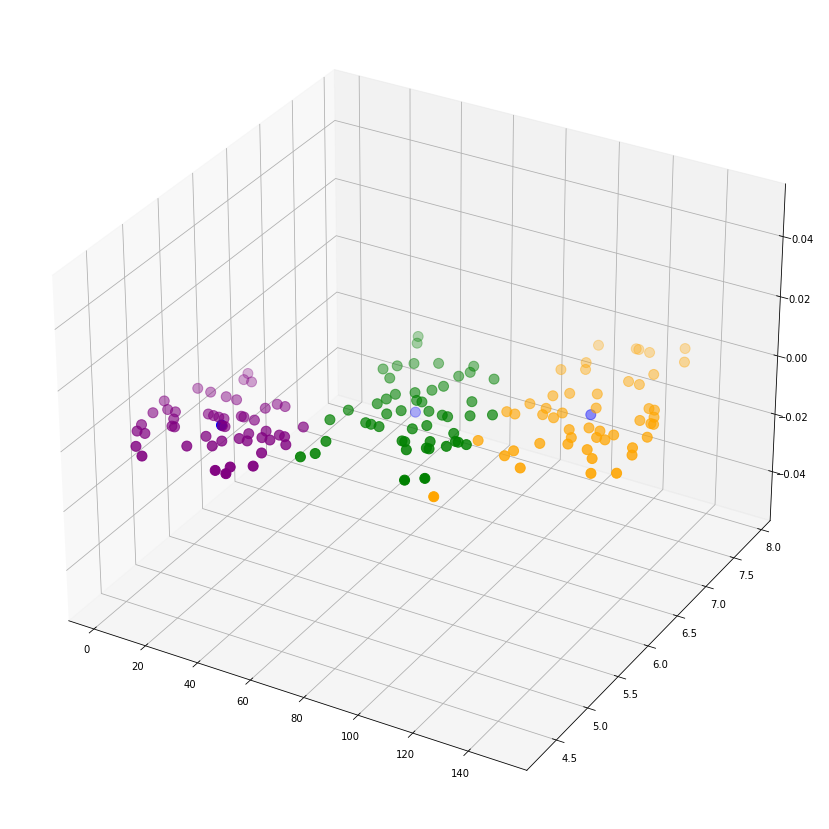

In [78]:
#3d scatterplot using matplotlib

fig = plt.figure(figsize=(15,15))
ax= fig.add_subplot(111,projection='3d')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100, c ='purple', label ='Iris-setos')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100, c ='orange', label ='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100, c ='green', label ='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')
